<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/ml07_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사 하강법(Gradient Descent)

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

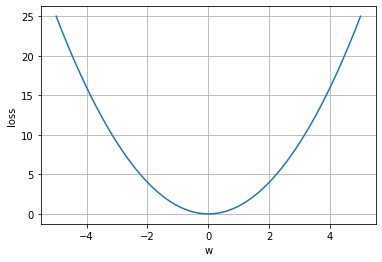

In [2]:
w = np.arange(-5, 5, 0.001)
loss = w ** 2 # 손실 함수: f(w) = w^2

plt.plot(w, loss)
plt.grid()
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

In [3]:
# 최솟값을 찾아가기 위한 임의의 w를 선택
w_init = 4
# 선택된 w에서의 접선의 기울기(gradient)
grad = 2 * w_init
# 선택된 최초의 w에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - 0.1 * grad
print(w_next)

3.2


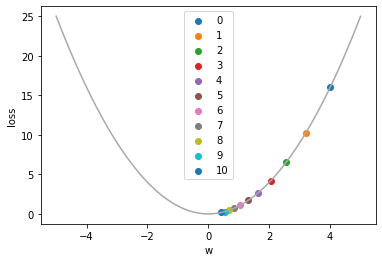

In [4]:
w = np.arange(-5, 5, 0.001)
loss = w ** 2 # 손실 함수
plt.plot(w, loss, color='darkgray')

# 최솟값을 찾아가기 위한 임의의 위치
w_init = 4
loss_init = w_init ** 2 # 임의의 위치에서의 손실 함수 f(w)의 리턴값
plt.scatter(w_init, loss_init, label='0')

learning_rate = 0.1 # gradient(기울기)에 곱해주는 값
for epoch in range(1, 11):  # 10번 반복
    grad = 2 * w_init # 현재 위치에서의 gradient(기울기)를 계산
    w_next = w_init - learning_rate * grad  # w를 gradient의 반대 방향으로 이동.
    loss_next = w_next ** 2 # 이동한 새로운 위치(w_next)에서 손실 함수 f(w)의 리턴값
    plt.scatter(w_next, loss_next, label=f'{epoch}') # 이동한 위치를 시각화
    w_init = w_next # 이동한 위치를 다음 이동에서 시작 위치로 사용 하기 위해서

plt.xlabel('w')
plt.ylabel('loss')
plt.legend()
plt.show()

# SGD(Stochastic Gradient Descent, 확률적 경사 하강법)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Fish Datasets

In [7]:
fish_scv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [8]:
fish = pd.read_csv(fish_scv)

In [9]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [10]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


Perch(농어)들의 무게를 Length, Diagonal, Heigth, Width 특성들을 사용해서 예측.

In [12]:
perch = fish[fish['Species'] == 'Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [15]:
X = perch.iloc[:, 2:].values   # 특성 행렬 (2차원 배열)
y = perch['Weight'].values  # 타겟 배열

In [16]:
X.shape, y.shape

((56, 4), (56,))

In [21]:
X[:5, :]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [22]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

## 훈련 셋, 테스트 셋 분리

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape

((44, 4), (12, 4))

In [37]:
y_train.shape, y_test.shape

((44,), (12,))

## ML 모델 생성, 학습, 평가

In [61]:
 # 모델 생성
sgd_reg = SGDRegressor(max_iter=1_000_000_000, learning_rate='adaptive', eta0=0.9)
#> max_iter: 최대 반복 횟수
#> learning_rate: 학습률을 변화시키는 방법. constant, adpative, invscaling(기본값), optimal.
#> eta0: learnin_rate='constant' 또는 'adaptive'일 때 사용하는 학습률의 초깃값.

In [58]:
sgd_reg.fit(X_train, y_train)   # 모델 훈련

SGDRegressor(eta0=0.9, learning_rate='adaptive', max_iter=1000000000)

In [59]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[5.48950337e+12]
[-2.44593263e+12  5.06230086e+11  7.02664543e+12 -1.61902595e+12]


In [60]:
train_pred = sgd_reg.predict(X_train)   # 훈련 셋 예측값
print(train_pred)

[ 3.10233864e+10  3.40969405e+12 -7.37754757e+11 -8.50131956e+11
  1.04749620e+12 -2.28583332e+11  4.57395033e+11 -2.95931385e+12
  1.37832763e+12  6.45366347e+12 -4.73842072e+12 -2.50139363e+12
 -1.57684521e+12  8.01129719e+11  4.91367904e+12 -3.80069873e+12
 -7.38735656e+11 -1.07934614e+11 -1.70192211e+12  1.74034116e+12
 -4.61297894e+12  4.03002646e+12  3.20869165e+12 -1.49551791e+12
  1.29987068e+12  9.75057054e+11 -1.82843779e+12 -1.67383631e+11
 -1.13926454e+12  6.86771643e+12 -3.67755938e+12 -1.27283278e+12
 -4.10016774e+11 -2.41362985e+11 -7.56634884e+12 -4.08796666e+12
 -3.08463804e+12  4.46316706e+12  3.90504657e+12  9.26614859e+11
  9.91365268e+11 -4.21938987e+12  4.16054390e+12  1.30948651e+12]


Fish 데이터 셋은 샘플의 개수가 너무 적기 때문에 SGD 알고리즘으로는 좋은 결과를 주지 못함. 다른 머신 러닝 알고리즘(KNN, Linear Regression)을 사용하는 것을 고려.

# California 주택 가격 데이터 셋

## 데이터 셋 준비

In [73]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [74]:
housing = fetch_california_housing()

In [76]:
type(housing)

sklearn.utils.Bunch

In [78]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [80]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [81]:
X, y = housing['data'], housing['target'] # X: 특성 행렬(2차원 배열), y: 타겟 배열

In [83]:
X.shape, y.shape

((20640, 8), (20640,))

In [85]:
X[:5, :]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

In [86]:
y[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

## 훈련 셋, 테스트 셋 분리

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [91]:
y_train.shape, y_test.shape

((16512,), (4128,))

### 스케일 변환(표준화)

In [92]:
std_scaler = StandardScaler() # 표준화 변환기 객체 생성

In [94]:
X_train_sc = std_scaler.fit_transform(X_train)  # 훈련 셋의 스케일을 변환

In [95]:
X_train_sc[:5, :]

array([[-0.326196  ,  0.34849025, -0.17491646, -0.20836543,  0.76827628,
         0.05137609, -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, -0.12853018, -0.09890135,
        -0.11736222, -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, -0.25753771, -0.44981806,
        -0.03227969, -0.46014647, -0.44760309],
       [-1.01786438,  0.58654547, -0.60001532, -0.14515634, -0.00743434,
         0.07750687, -1.38217186,  1.23269811],
       [-0.17148831,  1.14200767,  0.3490073 ,  0.08662432, -0.48587717,
        -0.06883176,  0.5320839 , -0.10855122]])

In [96]:
X_test_sc = std_scaler.transform(X_test)    # 테스트 셋의 스케일을 변환

In [97]:
X_test_sc[:5, :]

array([[-1.15508475, -0.28632369, -0.52068576, -0.17174603, -0.03030109,
         0.06740798,  0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537,  0.22347203,  0.12185077,
        -0.03602975, -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476,  0.20589202, -0.10241931,
        -0.14998876,  1.00947776, -1.42487026],
       [ 0.97511311, -0.92113763,  0.3051148 , -0.17655235,  0.24497944,
         0.03001135, -0.63799909,  0.42994293],
       [-0.08179356,  0.42784199,  0.02419284, -0.15846523, -0.31965346,
        -0.05297076,  0.45719859, -1.17058135]])

## SGD (회귀) 모델을 생성, 훈련, 평가

In [98]:
sgd_reg = SGDRegressor()    # 모델 생성

In [99]:
sgd_reg.fit(X_train_sc, y_train)    # 모델 훈련

SGDRegressor()

In [101]:
# 훈련 결과 - 절편(intercept_), 계수(coef_)
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[2.06833078]
[ 8.54300545e-01  1.19670439e-01 -3.06968716e-01  3.13534061e-01
  2.94609559e-04 -6.29119164e-02 -8.91589609e-01 -8.72480072e-01]


In [103]:
train_pred = sgd_reg.predict(X_train_sc) # 훈련 셋에서의 (집값) 예측값
print(train_pred[:5])

[1.93040151 2.48498753 2.65312606 1.55958256 1.60301363]


In [105]:
print(y_train[:5])  # 훈련 셋 실젯값

[1.03  3.821 1.726 0.934 0.965]


In [110]:
# 훈련 셋 평가
print('RMSE:', np.sqrt(mean_squared_error(y_train, train_pred)))
print('R^2:', r2_score(y_train, train_pred))

RMSE: 0.7209764374750094
R^2: 0.6111493897717436


In [113]:
test_pred = sgd_reg.predict(X_test_sc) # 테스트 셋 예측값
print(test_pred[:5])

[0.72610414 1.75616929 2.71529047 2.83402244 2.60945756]


In [114]:
print(y_test[:5])

[0.477   0.458   5.00001 2.186   2.78   ]


In [115]:
# 테스트 셋 평가
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_pred)))
print('R^2:', r2_score(y_test, test_pred))

RMSE: 0.7391032906454212
R^2: 0.5831273416821282
